# Week 4: Dynamic Capacity Utilization Curves

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import os
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib 
# import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

### load competition data and show some stats

In [15]:
df_comp_details = pd.read_csv('duopoly_competition_details.csv')
df_comp_details.fillna(0, inplace=True)

df_comp_details['revenue'] = df_comp_details['price'] * df_comp_details['demand']

df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,revenue
0,3A3gcX,1,1,AttentiveOriole,55.5,33.5,0,True,0.009,0.0,0.0
1,3A3gcX,1,2,AttentiveOriole,33.5,31.8,1,True,0.015,0.0,31.8
2,3A3gcX,1,3,AttentiveOriole,31.8,30.2,0,True,0.002,0.0,0.0


In [16]:
df_comp_details.groupby(['competitor_id','competition_id']).agg({
    'price' : 'mean',
    'price_competitor' : 'mean',
    'revenue' : 'sum'
}).round(1)

price  price_competitor  revenue
competitor_id   competition_id                                  
AttentiveOriole 3A3gcX           24.1              24.4  83950.4
                464dG3           24.0              24.3  84355.9
ThistleIbis     4QuPXN           23.7              23.1  76475.2
                8aRSZi           23.4              22.7  35276.7

In [17]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply( lambda x: 
                    "%s_%s" % (x.competition_id, x.selling_season), axis=1)

In [18]:
df_comp_details

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,revenue,unique_selling_season_key
0,3A3gcX,1,1,AttentiveOriole,55.5,33.5,0,True,0.009,0.0,0.0,3A3gcX_1
1,3A3gcX,1,2,AttentiveOriole,33.5,31.8,1,True,0.015,0.0,31.8,3A3gcX_1
2,3A3gcX,1,3,AttentiveOriole,31.8,30.2,0,True,0.002,0.0,0.0,3A3gcX_1
3,3A3gcX,1,4,AttentiveOriole,30.2,28.7,0,True,0.002,0.0,0.0,3A3gcX_1
4,3A3gcX,1,5,AttentiveOriole,28.7,37.7,0,True,0.002,0.0,0.0,3A3gcX_1
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,8aRSZi,100,96,ThistleIbis,19.0,20.0,1,True,0.025,0.0,20.0,8aRSZi_100
39996,8aRSZi,100,97,ThistleIbis,19.0,20.0,0,True,0.025,0.0,0.0,8aRSZi_100
39997,8aRSZi,100,98,ThistleIbis,19.0,20.0,0,True,0.025,0.0,0.0,8aRSZi_100
39998,8aRSZi,100,99,ThistleIbis,19.0,20.0,1,True,0.028,0.0,20.0,8aRSZi_100


In [19]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()
dfx_rev.head(3)

,unique_selling_season_key,revenue
0,3A3gcX_1,803.2
1,3A3gcX_10,745.1
2,3A3gcX_100,748.6


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

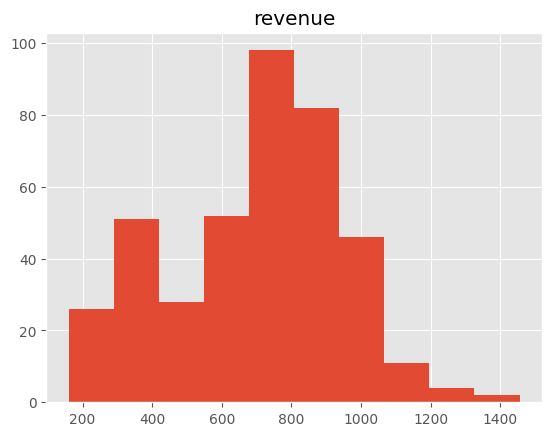

In [20]:
dfx_rev.hist()

## show the capacity utilization curve

In [21]:
df_comp_details.head()

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,revenue,unique_selling_season_key
0,3A3gcX,1,1,AttentiveOriole,55.5,33.5,0,True,0.009,0.0,0.0,3A3gcX_1
1,3A3gcX,1,2,AttentiveOriole,33.5,31.8,1,True,0.015,0.0,31.8,3A3gcX_1
2,3A3gcX,1,3,AttentiveOriole,31.8,30.2,0,True,0.002,0.0,0.0,3A3gcX_1
3,3A3gcX,1,4,AttentiveOriole,30.2,28.7,0,True,0.002,0.0,0.0,3A3gcX_1
4,3A3gcX,1,5,AttentiveOriole,28.7,37.7,0,True,0.002,0.0,0.0,3A3gcX_1


In [22]:
dfp_util = pd.pivot_table(df_comp_details, 
                        values='demand',
                        index = ['selling_period'],
                        columns=['unique_selling_season_key'],
                        aggfunc=np.mean,                       
)
    
# loop over columns to compute the % utilization
for c in dfp_util.columns:
    dfp_util[c] = dfp_util[c].cumsum()
    dfp_util[c] = round(dfp_util[c] / 80, 2)
    
dfp_util.tail()

C:\Users\yannl\AppData\Local\Temp\ipykernel_13404\2308113560.py:1: FutureWarning: The provided callable <function mean at 0x000001683C235940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dfp_util = pd.pivot_table(df_comp_details,


unique_selling_season_key,3A3gcX_1,3A3gcX_10,3A3gcX_100,3A3gcX_11,3A3gcX_12,3A3gcX_13,3A3gcX_14,3A3gcX_15,3A3gcX_16,3A3gcX_17,...,8aRSZi_90,8aRSZi_91,8aRSZi_92,8aRSZi_93,8aRSZi_94,8aRSZi_95,8aRSZi_96,8aRSZi_97,8aRSZi_98,8aRSZi_99
selling_period,,,,,,,,,,,,,,,,,,,,,
96,0.40,0.40,0.32,0.41,0.50,0.44,0.39,0.40,0.46,0.44,...,0.20,0.28,0.12,0.12,0.24,0.22,0.15,0.40,0.21,0.14
97,0.41,0.41,0.32,0.41,0.52,0.44,0.41,0.40,0.48,0.45,...,0.21,0.28,0.14,0.14,0.24,0.22,0.15,0.40,0.22,0.14
98,0.42,0.41,0.32,0.41,0.54,0.44,0.41,0.40,0.50,0.45,...,0.21,0.29,0.14,0.14,0.24,0.22,0.15,0.41,0.24,0.14
99,0.44,0.42,0.34,0.41,0.54,0.44,0.41,0.41,0.50,0.45,...,0.22,0.29,0.14,0.14,0.24,0.24,0.15,0.41,0.25,0.15
100,0.46,0.44,0.34,0.42,0.54,0.46,0.41,0.42,0.50,0.46,...,0.24,0.30,0.14,0.14,0.24,0.24,0.15,0.41,0.25,0.15


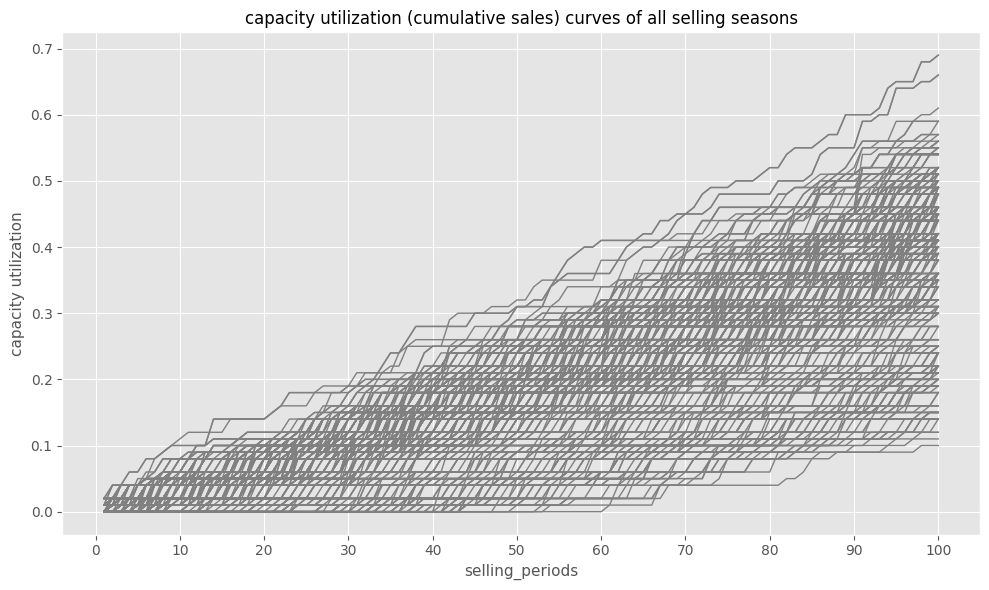

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_util.index, dfp_util, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of all selling seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

# (1) build target capacity utilization curve based on top 20% revenue selling seasons

In [ ]:
dfx_rev.revenue.quantile(0.8)
print(dfx_rev['unique_selling_season_key'])

905.4800000000005

In [25]:
top_selling_seasons = dfx_rev[dfx_rev.revenue>=  dfx_rev.revenue.quantile(0.8) ].unique_selling_season_key.unique()

top_selling_seasons[:10]

array(['3A3gcX_12', '3A3gcX_16', '3A3gcX_2', '3A3gcX_20', '3A3gcX_24',
       '3A3gcX_30', '3A3gcX_35', '3A3gcX_36', '3A3gcX_37', '3A3gcX_5'],
      dtype=object)

In [26]:
dfp_top_curves = dfp_util[top_selling_seasons]
dfp_top_curves.shape

(100, 80)

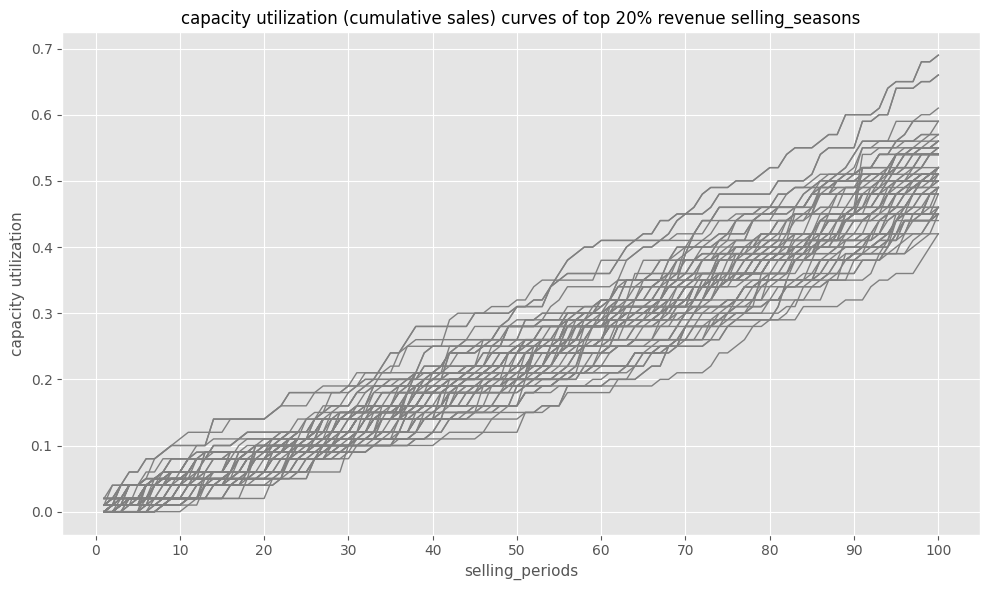

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_top_curves.index, dfp_top_curves, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of top 20% revenue selling_seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

In [28]:
dfp_top_curves.head()

unique_selling_season_key,3A3gcX_12,3A3gcX_16,3A3gcX_2,3A3gcX_20,3A3gcX_24,3A3gcX_30,3A3gcX_35,3A3gcX_36,3A3gcX_37,3A3gcX_5,...,4QuPXN_27,4QuPXN_37,4QuPXN_51,4QuPXN_52,4QuPXN_55,4QuPXN_58,4QuPXN_7,4QuPXN_82,4QuPXN_97,4QuPXN_98
selling_period,,,,,,,,,,,,,,,,,,,,,
1,0.02,0.01,0.01,0.00,0.00,0.0,0.02,0.02,0.01,0.01,...,0.00,0.01,0.00,0.00,0.0,0.01,0.00,0.00,0.00,0.00
2,0.02,0.01,0.02,0.00,0.00,0.0,0.02,0.02,0.01,0.02,...,0.01,0.01,0.01,0.01,0.0,0.02,0.00,0.00,0.00,0.01
3,0.04,0.01,0.02,0.01,0.01,0.0,0.02,0.04,0.01,0.02,...,0.01,0.01,0.01,0.01,0.0,0.02,0.01,0.01,0.02,0.01
4,0.04,0.01,0.04,0.01,0.01,0.0,0.02,0.04,0.02,0.04,...,0.01,0.02,0.04,0.01,0.0,0.02,0.01,0.01,0.02,0.01
5,0.04,0.01,0.04,0.04,0.01,0.0,0.02,0.04,0.02,0.04,...,0.02,0.02,0.04,0.01,0.0,0.02,0.02,0.01,0.02,0.01


<Axes: xlabel='selling_period'>

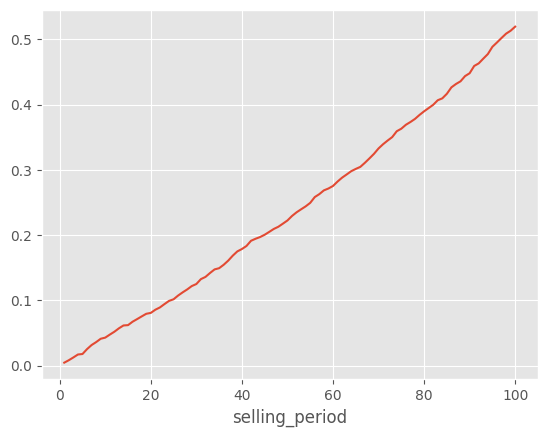

In [29]:
dfp_top_curves['mean_curve'] = dfp_top_curves.apply(lambda r: np.mean(r), axis=1)

dfp_top_curves['mean_curve'].plot()

In [30]:
target_sales_curve = {}
for t in np.arange(1,101,5):
    target = {}
    target['cap_util'] = round(dfp_top_curves.loc[t,'mean_curve'],2)
    target['sold_seats'] = round(dfp_top_curves.loc[t,'mean_curve'] * 80)
    target_sales_curve[str(t)] = target
    
target_sales_curve

{'1': {'cap_util': 0.0, 'sold_seats': 0},
 '6': {'cap_util': 0.03, 'sold_seats': 2},
 '11': {'cap_util': 0.05, 'sold_seats': 4},
 '16': {'cap_util': 0.07, 'sold_seats': 5},
 '21': {'cap_util': 0.09, 'sold_seats': 7},
 '26': {'cap_util': 0.11, 'sold_seats': 9},
 '31': {'cap_util': 0.13, 'sold_seats': 11},
 '36': {'cap_util': 0.15, 'sold_seats': 12},
 '41': {'cap_util': 0.18, 'sold_seats': 15},
 '46': {'cap_util': 0.2, 'sold_seats': 16},
 '51': {'cap_util': 0.23, 'sold_seats': 18},
 '56': {'cap_util': 0.26, 'sold_seats': 21},
 '61': {'cap_util': 0.28, 'sold_seats': 23},
 '66': {'cap_util': 0.3, 'sold_seats': 24},
 '71': {'cap_util': 0.34, 'sold_seats': 27},
 '76': {'cap_util': 0.37, 'sold_seats': 30},
 '81': {'cap_util': 0.39, 'sold_seats': 32},
 '86': {'cap_util': 0.43, 'sold_seats': 34},
 '91': {'cap_util': 0.46, 'sold_seats': 37},
 '96': {'cap_util': 0.5, 'sold_seats': 40}}

In [36]:
# save to pickle
with open('target_sales_curve_moyen_results.pkl', "wb") as f:
    pickle.dump(target_sales_curve, f, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
# load from pickle
with open('target_sales_curve.pkl', 'rb') as f:
            target_curve = pickle.load(f)
target_curve

{'1': {'cap_util': 0.0, 'sold_seats': 0},
 '6': {'cap_util': 0.03, 'sold_seats': 2},
 '11': {'cap_util': 0.05, 'sold_seats': 4},
 '16': {'cap_util': 0.07, 'sold_seats': 5},
 '21': {'cap_util': 0.09, 'sold_seats': 7},
 '26': {'cap_util': 0.11, 'sold_seats': 9},
 '31': {'cap_util': 0.13, 'sold_seats': 11},
 '36': {'cap_util': 0.15, 'sold_seats': 12},
 '41': {'cap_util': 0.18, 'sold_seats': 15},
 '46': {'cap_util': 0.2, 'sold_seats': 16},
 '51': {'cap_util': 0.23, 'sold_seats': 18},
 '56': {'cap_util': 0.26, 'sold_seats': 21},
 '61': {'cap_util': 0.28, 'sold_seats': 23},
 '66': {'cap_util': 0.3, 'sold_seats': 24},
 '71': {'cap_util': 0.34, 'sold_seats': 27},
 '76': {'cap_util': 0.37, 'sold_seats': 30},
 '81': {'cap_util': 0.39, 'sold_seats': 32},
 '86': {'cap_util': 0.43, 'sold_seats': 34},
 '91': {'cap_util': 0.46, 'sold_seats': 37},
 '96': {'cap_util': 0.5, 'sold_seats': 40}}

In [33]:
def get_target():
    target_curve = {}
    try:
        # load from pickle
        with open('target_sales_curve.pkl', 'rb') as f:
                    target_curve = pickle.load(f)
    except:
        target_curve = {}
    return target_curve

target_curve = get_target()
target_curve

{'1': {'cap_util': 0.0, 'sold_seats': 0},
 '6': {'cap_util': 0.03, 'sold_seats': 2},
 '11': {'cap_util': 0.05, 'sold_seats': 4},
 '16': {'cap_util': 0.07, 'sold_seats': 5},
 '21': {'cap_util': 0.09, 'sold_seats': 7},
 '26': {'cap_util': 0.11, 'sold_seats': 9},
 '31': {'cap_util': 0.13, 'sold_seats': 11},
 '36': {'cap_util': 0.15, 'sold_seats': 12},
 '41': {'cap_util': 0.18, 'sold_seats': 15},
 '46': {'cap_util': 0.2, 'sold_seats': 16},
 '51': {'cap_util': 0.23, 'sold_seats': 18},
 '56': {'cap_util': 0.26, 'sold_seats': 21},
 '61': {'cap_util': 0.28, 'sold_seats': 23},
 '66': {'cap_util': 0.3, 'sold_seats': 24},
 '71': {'cap_util': 0.34, 'sold_seats': 27},
 '76': {'cap_util': 0.37, 'sold_seats': 30},
 '81': {'cap_util': 0.39, 'sold_seats': 32},
 '86': {'cap_util': 0.43, 'sold_seats': 34},
 '91': {'cap_util': 0.46, 'sold_seats': 37},
 '96': {'cap_util': 0.5, 'sold_seats': 40}}

# (2) Build randomized versions of the target capacity utilization curve

**idea:**

- estimate from the given curve the distribution of slope-steps
- draw random samples from this curve and use this to build new curves



In [ ]:
df = pd.DataFrame(columns=['selling_period','perc_sales_target'])
for i in target_curve.keys():
    df.loc[len(df)] = [i, target_curve.get(i).get('cap_util') ]

df.tail(10)

,selling_period,perc_sales_target
0,1,0.00
1,6,0.03
2,11,0.05
3,16,0.07
4,21,0.09
5,26,0.11
6,31,0.13
7,36,0.15
8,41,0.18
9,46,0.20


## (a) estimate the slope increases of the target curve as delta every 5 time periods

In [39]:
dfp_top_curves

unique_selling_season_key,3A3gcX_12,3A3gcX_16,3A3gcX_2,3A3gcX_20,3A3gcX_24,3A3gcX_30,3A3gcX_35,3A3gcX_36,3A3gcX_37,3A3gcX_5,...,4QuPXN_37,4QuPXN_51,4QuPXN_52,4QuPXN_55,4QuPXN_58,4QuPXN_7,4QuPXN_82,4QuPXN_97,4QuPXN_98,mean_curve
selling_period,,,,,,,,,,,,,,,,,,,,,
1,0.02,0.01,0.01,0.00,0.00,0.00,0.02,0.02,0.01,0.01,...,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.004625
2,0.02,0.01,0.02,0.00,0.00,0.00,0.02,0.02,0.01,0.02,...,0.01,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.008375
3,0.04,0.01,0.02,0.01,0.01,0.00,0.02,0.04,0.01,0.02,...,0.01,0.01,0.01,0.00,0.02,0.01,0.01,0.02,0.01,0.012625
4,0.04,0.01,0.04,0.01,0.01,0.00,0.02,0.04,0.02,0.04,...,0.02,0.04,0.01,0.00,0.02,0.01,0.01,0.02,0.01,0.017125
5,0.04,0.01,0.04,0.04,0.01,0.00,0.02,0.04,0.02,0.04,...,0.02,0.04,0.01,0.00,0.02,0.02,0.01,0.02,0.01,0.017875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.50,0.46,0.52,0.54,0.55,0.46,0.44,0.49,0.49,0.54,...,0.48,0.51,0.54,0.59,0.56,0.48,0.48,0.54,0.50,0.495250
97,0.52,0.48,0.52,0.54,0.55,0.46,0.44,0.49,0.50,0.54,...,0.49,0.51,0.54,0.59,0.56,0.49,0.49,0.54,0.51,0.502125
98,0.54,0.50,0.52,0.54,0.55,0.48,0.45,0.49,0.51,0.54,...,0.50,0.51,0.55,0.60,0.56,0.50,0.50,0.55,0.52,0.508750


In [46]:
df['shifted_target'] = df['perc_sales_target'].shift(1)
df


,selling_period,perc_sales_target,shifted_target
0,1,0.00,NaN
1,6,0.03,0.00
2,11,0.05,0.03
3,16,0.07,0.05
4,21,0.09,0.07
5,26,0.11,0.09
6,31,0.13,0.11
7,36,0.15,0.13
8,41,0.18,0.15
9,46,0.20,0.18


## (b) show the distribution (histogram) of the 5-step target increases

<Axes: >

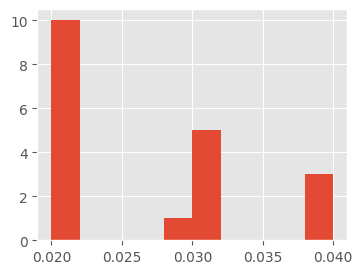

In [47]:
df['5day_delta'] =  df['perc_sales_target'] - df['shifted_target']
df['5day_delta'].hist(figsize=(4,3))

## (c) fit a normal distribution to these delta-values

In [48]:
delta_values = df['5day_delta'].dropna().values
delta_values

array([0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.03,
       0.02, 0.02, 0.04, 0.03, 0.02, 0.04, 0.03, 0.04])

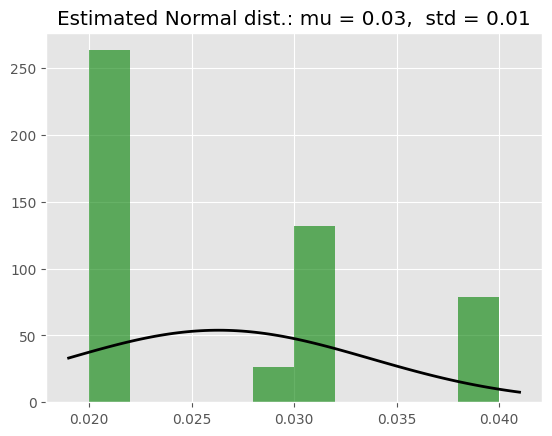

In [49]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(delta_values)

# Plot the histogram.
plt.hist(delta_values, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Estimated Normal dist.: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## (d) use distribution to fit new curves

In [50]:
norm.rvs(loc=mu, scale=std, size=20)

array([0.02446891, 0.01367803, 0.0195428 , 0.01456463, 0.0244444 ,
       0.02067093, 0.0208413 , 0.01486796, 0.03279763, 0.0195748 ,
       0.02713503, 0.01566905, 0.02796363, 0.01484036, 0.03515958,
       0.03555792, 0.02666051, 0.02655338, 0.03376966, 0.03188966])

<Axes: >

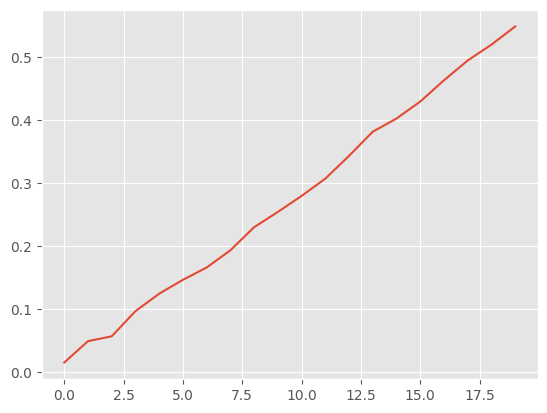

In [ ]:
# generate random steps
df['sample_curve_1'] = norm.rvs(loc=mu, scale=std, size=20)

# aggregate the new random price curve
df['sample_curve_1'] = df['sample_curve_1'].cumsum()

# replace any value above 1 with 1, note that .where replaces the not holding False situations
df['sample_curve_1'].where(df['sample_curve_1']<1,1)

df['sample_curve_1'].plot()

#### plot random curve vs. input target curve

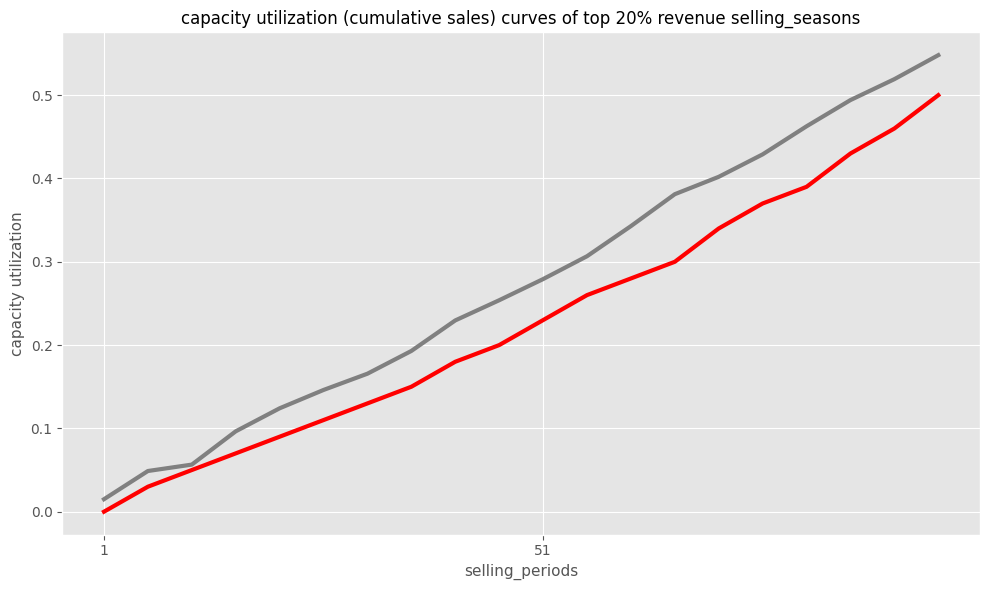

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['selling_period'], df['perc_sales_target'], color='r', 
        linestyle='-', linewidth=3, label='org curve')

ax.plot(df['selling_period'], df['sample_curve_1'], color='grey', 
        linestyle='-', linewidth=3, label='random curve')

ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of top 20% revenue selling_seasons", size=12)

ax.grid(True)
fig.tight_layout()

plt.show()